In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')

In [3]:
news_data = pd.read_csv('news.csv')

In [4]:
news_data.shape

(6335, 4)

In [5]:
news_data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [6]:
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
txt_length = news_data.text.str.split().str.len()

In [8]:
txt_length.describe()

count     6335.000000
mean       776.300710
std        854.333358
min          0.000000
25%        289.000000
50%        597.000000
75%       1024.000000
max      20891.000000
Name: text, dtype: float64

In [9]:
title_length = news_data.title.str.split().str.len()

In [10]:
title_length.describe()

count    6335.000000
mean       10.496448
std         3.985165
min         1.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        53.000000
Name: title, dtype: float64

### Data Cleaning for Analysis

##### Drop unused rows and columns.
##### Perform null value imputation.
##### Remove special characters.
##### Remove stop words.

In [11]:
news_data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [12]:
# Constants that are used to sanitize the datasets 

column_n = ['Unnamed: 0', 'title', 'text', 'label']
remove_c = ['Unnamed: 0']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [13]:
# Clean Datasets
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# Removed unused clumns
def remove_unused_c(df,column_n=remove_c):
    df = df.drop(column_n,axis=1)
    return df

# Impute null values with None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)
    #impute null values
    df = null_process(df)
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [14]:
# Perform data cleaning on train and test dataset by calling clean_dataset function
news_data = clean_dataset(news_data)
# apply preprocessing on text through apply method by calling the function nltk_preprocess
news_data["text"] = news_data.text.apply(nltk_preprocess)
# apply preprocessing on title through apply method by calling the function nltk_preprocess
news_data["title"] = news_data.title.apply(nltk_preprocess)

In [15]:
news_data.head()

,title,text,label
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...,REAL
3,bernie supporter twitter erupt anger dnc tried...,kaydee king kaydeeking november 9 2016 lesson ...,FAKE
4,battle new york primary matter,primary day new york frontrunners hillary clin...,REAL


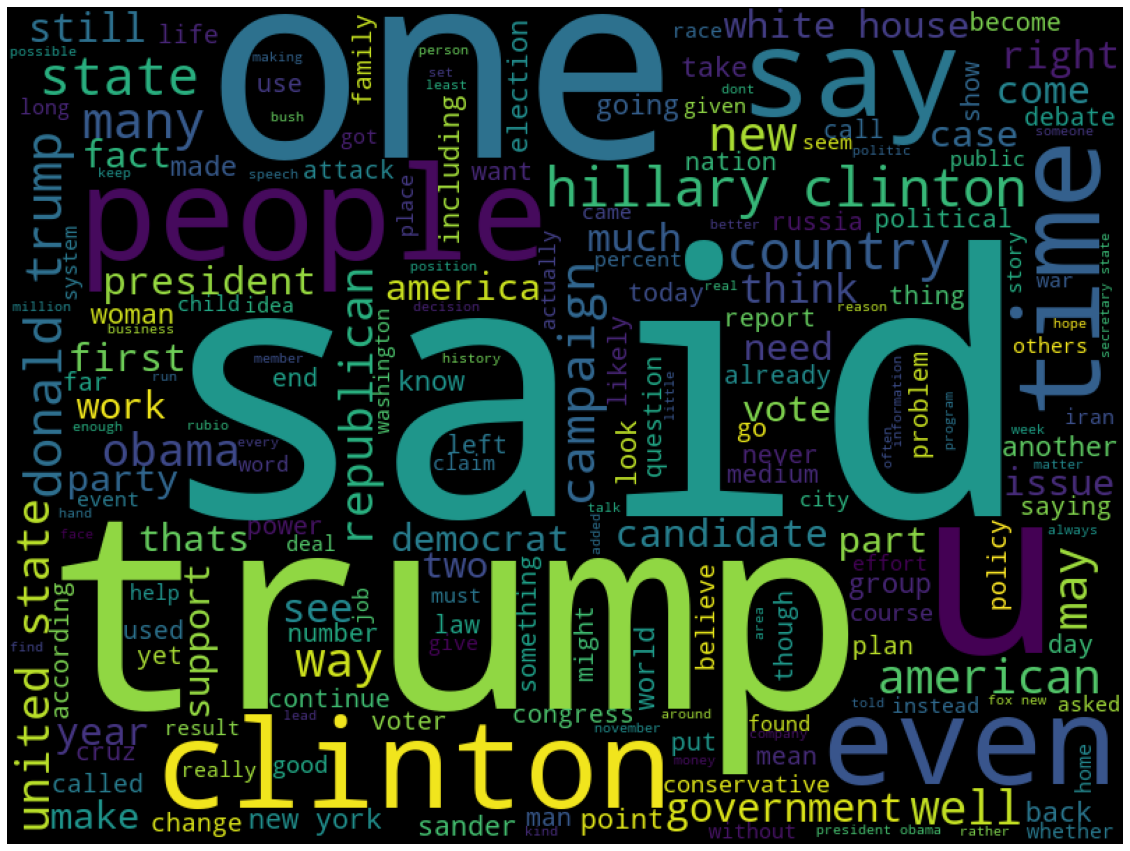

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(news_data['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()